### 5.3.4　验证实践：网格搜索

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(N, err=1.0, rseed=1):
    # 随机轴样数据
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

前面的内容已经让我们对偏差与方差的均衡有了直观的认识，它们与模型的复杂度和训练集的大小有关。在实际工作中，模型通常会有多个得分转折点，因此验证曲线和学习曲线的图形会从二维曲线变成多维曲面。这种高维可视化很难展现，因此从图中找出验证得分的最大值也不是一件简单的事。

Scikit-Learn 在grid_search 提供了一个自动化工具解决这个问题。下面是用网格搜索寻找最优多项式回归模型的示例。我们将在模型特征的三维网格中寻找最优值——包括多项式的次数的搜索范围、回归模型是否拟合截距，以及回归模型是否需要进行标准化处理。我们可以用Scikit-Learn 的GridSearchCV 元评估器来设置这些参数：

In [4]:
from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

请注意，和普通的评估器一样，这个元评估器此时还没有应用到任何数据上。调用fit()方法在每个网格点上拟合模型，并同时记录每个点的得分：

In [5]:
grid.fit(X, y);

模型拟合完成了，这样就可以获取最优参数了：

In [6]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

最后，还可以用最优参数的模型拟合数据，并画图显示（如图5-34 所示）：

NameError: name 'X_test' is not defined

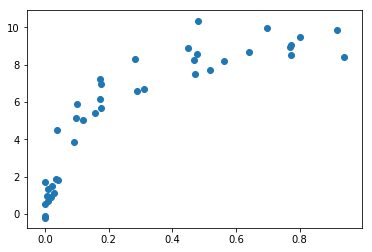

In [9]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim);